In [205]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import bamboolib as bam

In [140]:
# Import model

expected_model_version = '1.0'
model_path = r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Five - Modeling\models\ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [218]:
# Import data
ski_data = pd.read_csv(r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Four - Preprocessing and Training\data\ski_data_step4_features.csv')

In [219]:
# Define subset for plot data
dfPlot = ski_data.copy()

In [220]:
# Subset rows for plot data
dfPlot.dropna(subset=['AdultWeekend'], inplace=True)

In [221]:
# Subset cols for model prediction
x_features = dfPlot.set_index(['Name','Region','state']).copy()
x_bmr = x_features.loc['Big Mountain Resort',model.X_columns].copy()

In [222]:
# Define model plot parameters
modelPlotCount = 10
maxVals = x_features.max()
minVals = x_features.min()
plotInterval = (maxVals - minVals) / modelPlotCount
xColsCount = len(model.X_columns)

In [223]:
# Define empty DataFrames for iterating through model prediction scenarios
df = pd.DataFrame(index=[i for i in range(0,modelPlotCount)], columns = model.X_columns).copy()
x_modelVars = df.copy()
y_modelOutput = df.copy()

In [224]:
# Populate x_modelVars with features variables at each interval
x_modelVars.iloc[0,:] = minVals
for i in range(1,modelPlotCount):
    x_modelVars.iloc[i,:] = x_modelVars.iloc[i-1,:] + plotInterval

In [225]:
# Populate y_modelOutput with adjusted predictions for each value in x_modelVars
for col in range(0,xColsCount):
    for row in range(0,modelPlotCount):
        x_bmrMod = x_bmr.copy()
        x_bmrMod.iloc[0,col] = x_modelVars.iloc[row,col]
        y_modelOutput.iloc[row,col] = model.predict(x_bmrMod).item()
        #print('r' + str(row))
    print('c' + str(col))

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9
c10
c11
c12
c13
c14
c15
c16
c17
c18
c19
c20
c21
c22
c23
c24
c25
c26
c27
c28
c29
c30
c31


In [227]:
y_modelOutput.T

,0,1,2,3,4,5,6,7,8,9
summit_elev,91.2184,91.5534,91.7952,91.7102,91.4452,91.7872,91.8092,92.8522,92.9252,93.1152
vertical_drop,90.1314,90.3174,91.3234,91.5282,91.5142,91.7392,97.6392,100.212,100.177,100.446
base_elev,91.911,91.9032,91.8192,91.7502,91.8322,91.7232,91.9692,91.8292,91.9062,91.8022
trams,91.7842,91.7842,91.9152,91.9152,91.9152,91.9152,92.0572,92.3022,92.3022,92.3022
fastSixes,91.7842,91.7842,91.7842,92.6962,92.6962,92.6962,92.7632,92.7632,93.7282,93.7282
fastQuads,83.9388,91.7012,91.7842,114.774,118.109,118.347,122.356,122.805,123.422,123.422
quad,90.763,91.2362,91.7842,91.7822,91.9412,91.9412,91.9382,91.7402,91.6992,91.6992
triple,91.0962,91.3382,92.1202,92.1422,92.0902,92.0972,92.0982,91.7842,91.7842,91.7842
double,91.7842,91.6532,91.5632,91.7622,91.7662,91.7722,91.7722,91.7722,91.7722,91.7722
surface,91.4812,91.2492,91.7772,91.7842,91.7962,91.7962,91.8512,91.8362,91.8362,92.1942


In [228]:
dfPlot.T

,0,1,2,3,4,5,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort,Yosemite Ski & Snowboard Area,Dodge Ridge,Donner Ski Ranch,Mammoth Mountain Ski Area,Mt. Shasta Ski Park,...,Trollhaugen,Tyrol Basin,Whitecap Mountain,Wilmot Mountain,Grand Targhee Resort,Hogadon Basin,Sleeping Giant Ski Resort,Snow King Resort,Snowy Range Ski & Recreation Area,White Pine Ski Area
Region,Alaska,Alaska,Alaska,Arizona,Arizona,Northern California,Sierra Nevada,Sierra Nevada,Sierra Nevada,Sierra Nevada,...,Wisconsin,Wisconsin,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
state,Alaska,Alaska,Alaska,Arizona,Arizona,California,California,California,California,California,...,Wisconsin,Wisconsin,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
summit_elev,3939,2600,2090,11500,11100,7800,8200,8012,11053,6890,...,1200,1160,1750,1030,9920,8000,7428,7808,9663,9500
vertical_drop,2500,1540,294,2300,1800,600,1600,750,3100,1435,...,260,300,400,230,2270,640,810,1571,990,1100
base_elev,250,1200,1796,9200,9200,7200,6600,7031,7953,5500,...,920,860,1295,800,7851,7400,6619,6237,8798,8400
trams,1,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
fastSixes,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
fastQuads,2,0,0,0,1,0,0,0,9,0,...,0,0,0,0,2,0,0,0,0,0
quad,2,0,0,2,2,0,1,0,1,0,...,2,0,1,3,2,0,0,1,0,0


In [229]:
sPlotData = dfPlot.copy()

In [236]:
def setHue(state):
    if state == 'Montana': return 'Montana'
    elif state in ['Idaho','Wyoming','North Dakota','South Dakota']: return 'Adjacent State'
    else: return 'Other'

In [258]:
sPlotData['Hue'] = list(map(setHue,statesList))

In [259]:
sPlotData['Hue']

0               Other
1               Other
2               Other
3               Other
4               Other
            ...      
276    Adjacent State
277    Adjacent State
278    Adjacent State
279    Adjacent State
280    Adjacent State
Name: Hue, Length: 277, dtype: object

In [244]:
state = 'test'

In [245]:
setHue(state)

'Other'

In [247]:
list(sPlotData['state'])

['Alaska',
 'Alaska',
 'Alaska',
 'Arizona',
 'Arizona',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Colorado',
 'Connecticut',
 'Connecticut',
 'Connecticut',
 'Connecticut',
 'Connecticut',
 'Idaho',
 'Idaho',
 'Idaho',
 'Idaho',
 'Idaho',
 'Idaho',
 'Idaho',
 'Idaho',
 'Idaho',
 'Idaho',
 'Illinois',
 'Illinois',
 'Illinois',
 'Indiana',
 'Indiana',
 'Iowa',
 'Iowa',
 'Iowa',
 'Maine',
 'Maine',
 'Maine',
 'Maine',
 'Maine',
 'Maine',
 'Maine',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Massachusetts',
 'Michigan',
 'Michigan',
 'Michigan',

In [239]:
sPlotData.T

,0,1,2,3,4,5,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort,Yosemite Ski & Snowboard Area,Dodge Ridge,Donner Ski Ranch,Mammoth Mountain Ski Area,Mt. Shasta Ski Park,...,Trollhaugen,Tyrol Basin,Whitecap Mountain,Wilmot Mountain,Grand Targhee Resort,Hogadon Basin,Sleeping Giant Ski Resort,Snow King Resort,Snowy Range Ski & Recreation Area,White Pine Ski Area
Region,Alaska,Alaska,Alaska,Arizona,Arizona,Northern California,Sierra Nevada,Sierra Nevada,Sierra Nevada,Sierra Nevada,...,Wisconsin,Wisconsin,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
state,Alaska,Alaska,Alaska,Arizona,Arizona,California,California,California,California,California,...,Wisconsin,Wisconsin,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
summit_elev,3939,2600,2090,11500,11100,7800,8200,8012,11053,6890,...,1200,1160,1750,1030,9920,8000,7428,7808,9663,9500
vertical_drop,2500,1540,294,2300,1800,600,1600,750,3100,1435,...,260,300,400,230,2270,640,810,1571,990,1100
base_elev,250,1200,1796,9200,9200,7200,6600,7031,7953,5500,...,920,860,1295,800,7851,7400,6619,6237,8798,8400
trams,1,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
fastSixes,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
fastQuads,2,0,0,0,1,0,0,0,9,0,...,0,0,0,0,2,0,0,0,0,0
quad,2,0,0,2,2,0,1,0,1,0,...,2,0,1,3,2,0,0,1,0,0


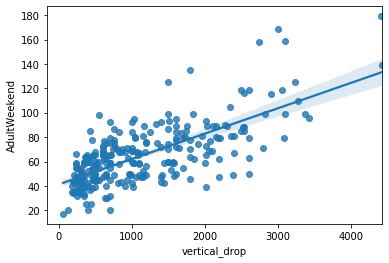

In [214]:
fig, ax = plt.subplots()
sb.regplot(x='vertical_drop', y='AdultWeekend', data=dfPlot)  #, ax=ax)
plt.show()

In [209]:
sb.regplot(x='vertical_drop', y='AdultWeekend', data=dfPlot, ax=ax)

In [210]:
sb.plt.show()

AttributeError: module 'seaborn' has no attribute 'plt'

In [57]:
fig, ax = plt.subplots()
sb.regplot(x=x, y=y, data=firm, ax=ax)
ax2 = ax.twinx()
sb.regplot(x='round', y='dead', data=firm, ax=ax2, color='r')
sb.plt.show()

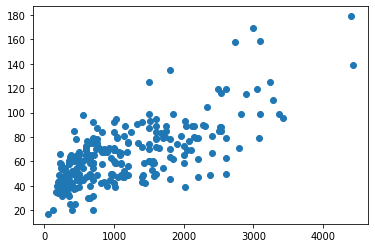

In [101]:
plt.scatter(x,y)

In [ ]:
# Get Big Mountain Resort Data, x_bmr:
dfPlotNames = dfPlot['Name']
dfPlot = dfPlot.T
dfPlot.columns = dfPlotNames
bmr = dfPlot.pop('Big Mountain Resort')
x_bmr = pd.DataFrame(bmr).T
x_bmr = x_bmr.set_index(['Name','Region','state'])
dfPlot = dfPlot.T

In [ ]:
# Divide y from x plot parameters
x_features = dfPlot
y_prices = pd.DataFrame(x_features.pop('AdultWeekend'))
y_bmrPrice = x_bmr.pop('AdultWeekend')

In [58]:
x_modelVars.loc[:,features]

,vertical_drop
0,60
1,103.65
2,147.3
3,190.95
4,234.6
...,...
95,4206.75
96,4250.4
97,4294.05
98,4337.7


In [59]:
dfGraph = pd.DataFrame(columns=features, index=x_modelVars.index)


In [62]:
dfGraph = x_modelVars.loc[:,features]

In [63]:
dfGraph

,vertical_drop
0,60
1,103.65
2,147.3
3,190.95
4,234.6
...,...
95,4206.75
96,4250.4
97,4294.05
98,4337.7


In [61]:
dfGraph.loc[features] = x_modelVars.loc[:,features]

KeyError: "None of [Index(['vertical_drop'], dtype='object')] are in the [index]"

In [45]:
dfGraph = dfGraph.reset_index()
dfGraph

,x,y,hue


In [ ]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)